# Import Modules

In [15]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist

from sklearn.metrics import confusion_matrix

# Load Dataset

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


# Train Model

In [8]:
i = Input(shape=X_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               80384     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [10]:
es = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, 
              validation_data=(X_test, y_test), 
              epochs=50, callbacks=[es])

Epoch 1/50
1875/1875 [==============================] - 65s 34ms/step - loss: 0.3373 - accuracy: 0.8915 - val_loss: 0.1361 - val_accuracy: 0.9585
Epoch 2/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1075 - accuracy: 0.9677 - val_loss: 0.0863 - val_accuracy: 0.9741
Epoch 3/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0743 - accuracy: 0.9769 - val_loss: 0.0674 - val_accuracy: 0.9794
Epoch 4/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0563 - accuracy: 0.9828 - val_loss: 0.0580 - val_accuracy: 0.9827
Epoch 5/50
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0529 - val_accuracy: 0.9849
Epoch 6/50
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0574 - val_accuracy: 0.9825
Epoch 7/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.0499 -

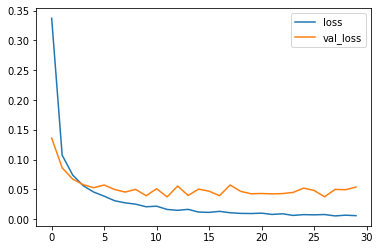

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show();

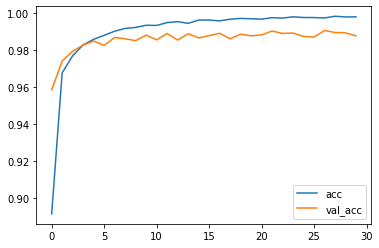

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show();

# Evaluation

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization


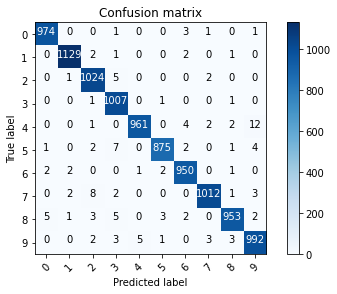

In [19]:
y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, list(range(10)))

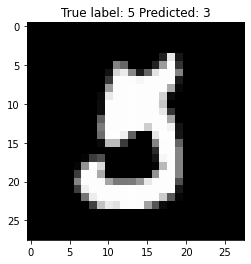

In [25]:
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]));